In [1]:
pip install notebook

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os

In [4]:
os.getcwd()

'/Users/louise'

In [6]:
os.chdir('/Users/louise/Desktop')

In [7]:
df = pd. read_csv('survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

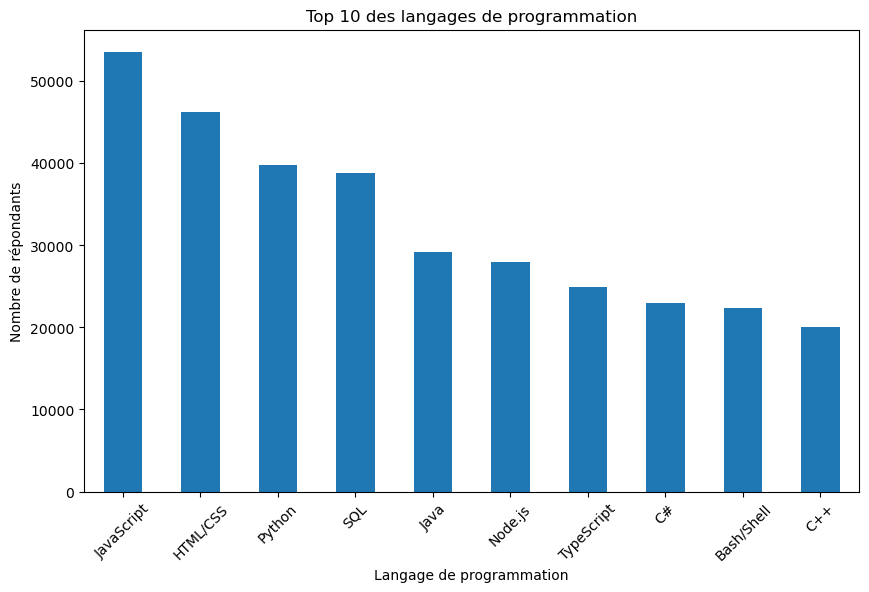

In [16]:
#Diagramme en barres pour les langages de programmation les plus populaires

top_languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar')
plt.title('Top 10 des langages de programmation')
plt.xlabel('Langage de programmation')
plt.ylabel('Nombre de répondants')
plt.xticks(rotation=45)
plt.show()

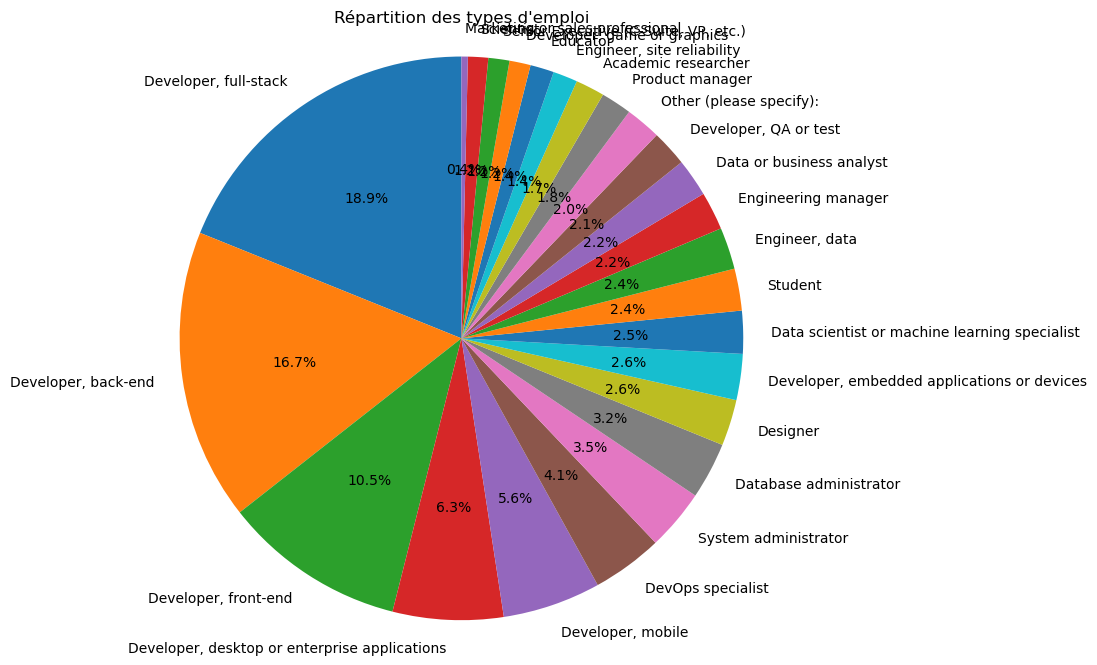

In [18]:
# Diagramme circulaire pour les types d'emploi

job_types = df['DevType'].str.split(';', expand=True).stack().value_counts()
plt.figure(figsize=(8, 8))
job_types.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Répartition des types d\'emploi')
plt.ylabel('')
plt.axis('equal')
plt.show()

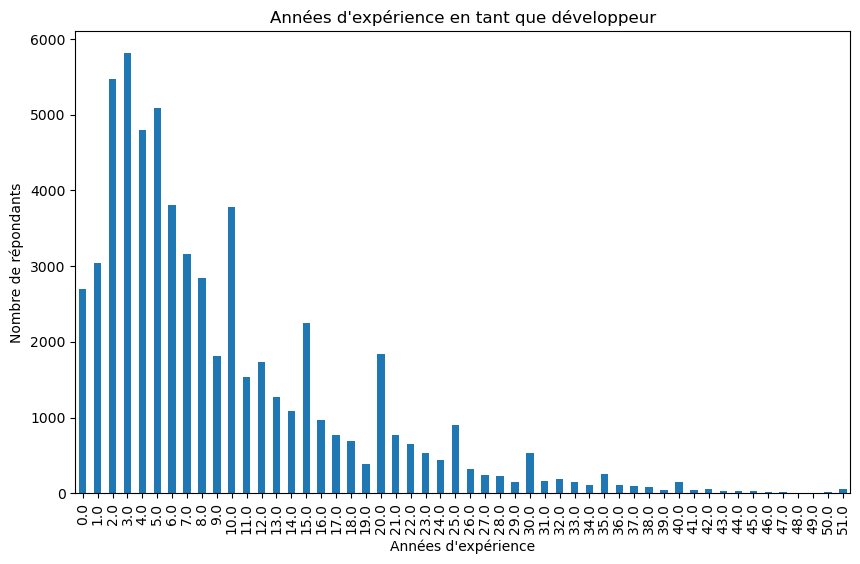

In [26]:
# Diagramme en barres pour l'expérience de développement

experience = df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years': '51'}).astype(float)
plt.figure(figsize=(10, 6))
experience.value_counts().sort_index().plot(kind='bar')
plt.title('Années d\'expérience en tant que développeur')
plt.xlabel('Années d\'expérience')
plt.ylabel('Nombre de répondants')
plt.show()

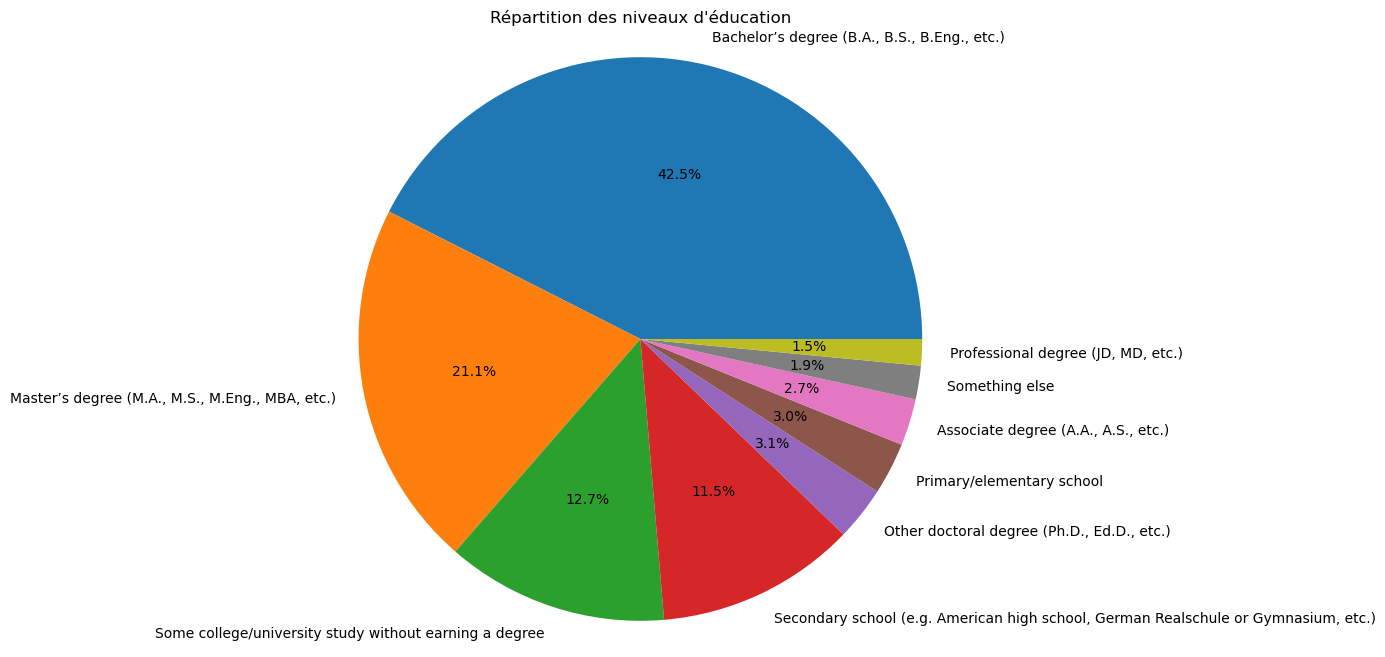

In [20]:
# Diagramme circulaire sur la répartition des nieaux d'éducation
education_levels = df['EdLevel'].value_counts()
plt.figure(figsize=(8, 8))
education_levels.plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des niveaux d\'éducation')
plt.ylabel('')
plt.axis('equal')
plt.show()

<Figure size 1000x600 with 0 Axes>

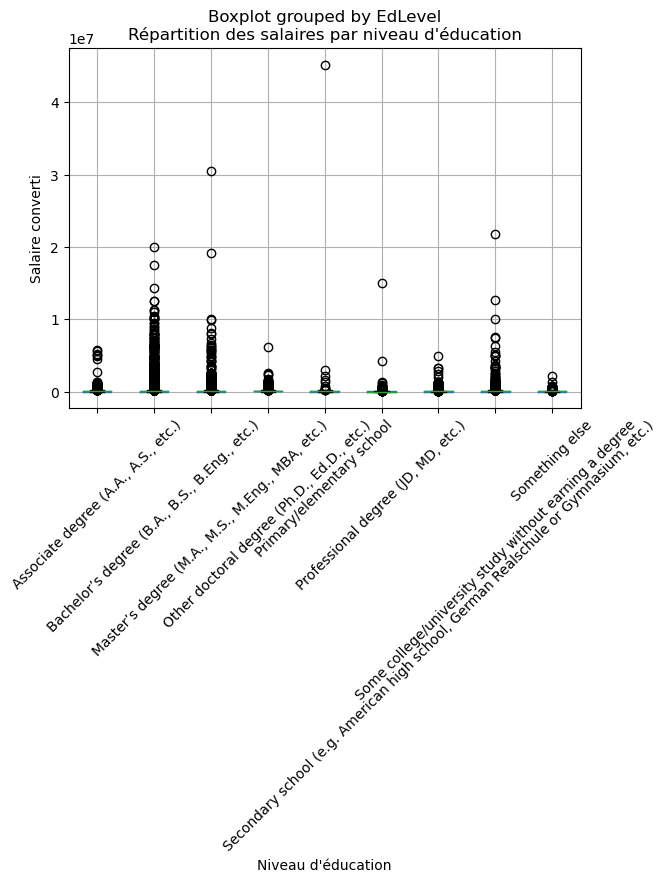

In [22]:
# Répartition des salaires par niveau d'éducation
plt.figure(figsize=(10, 6))
df.boxplot(column='ConvertedCompYearly', by='EdLevel')
plt.title('Répartition des salaires par niveau d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Salaire converti')
plt.xticks(rotation=45)
plt.show()